# Title: 

#### Import all necessary libraries. 

In [52]:
import csv

import numpy as np
import pandas as pd
import os

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from scipy.stats import pearsonr

#### Import The JOLTS report. 
JOLTS Total Report Summary: The JOLTS (Job Openings and Labor Turnover Survey) Total Report provides data on the number of job openings, hires, and separations in the U.S. labor market. It is used by researchers and economists to assess labor market dynamics, such as job availability and employee turnover rates, which can indicate economic health and help in forecasting trends. The data is crucial for understanding labor demand, identifying skills gaps, and shaping workforce policies.

Note: This report includes all sectors. Also, I displayed the Head and the Tail to ensure all data were imported properly. 

In [53]:
jolts_data= pd.read_csv('./JTSJOL_Monthly.csv')
jolts_data = jolts_data.rename(columns={"JTSJOL": "JTSJOL"})
jolts_data.head(5), jolts_data.tail(5) 

(  observation_date  JTSJOL
 0       2000-12-01    5088
 1       2001-01-01    5234
 2       2001-02-01    5097
 3       2001-03-01    4762
 4       2001-04-01    4615,
     observation_date  JTSJOL
 279       2024-03-01    8355
 280       2024-04-01    7919
 281       2024-05-01    8230
 282       2024-06-01    7910
 283       2024-07-01    7673)

#### Import SPY Price History 2000-2024
**SPY500 Summary:** The SPY500, commonly referred to as the S&P 500 ETF (Exchange-Traded Fund), is a fund that aims to replicate the performance of the S&P 500 Index, which includes 500 of the largest publicly traded companies in the U.S. The SPY500 is used to gauge overall market performance and economic health, as it reflects a significant portion of the U.S. equity market. 

In [54]:
spy_data = pd.read_csv('./SPYETFStockPriceHistory2000_2024.csv')
spy_data.head(5), spy_data.tail(5)

(         Date   Price    Open    High     Low     Vol. Change %
 0  09/01/2024  562.01  563.68  563.68  539.44  463.88M   -0.30%
 1  08/01/2024  563.68  552.57  564.20  510.27   62.70M    2.34%
 2  07/01/2024  550.81  545.63  565.16  537.45    1.04B    1.21%
 3  06/01/2024  544.22  529.02  550.28  522.60  888.92M    3.20%
 4  05/01/2024  527.37  501.38  533.07  499.55    1.15B    5.06%,
            Date   Price    Open    High     Low     Vol. Change %
 281  04/01/2001  124.91  116.30  127.27  109.30  252.00M    7.04%
 282  03/01/2001  116.69  124.05  127.75  108.04  318.20M   -5.86%
 283  02/01/2001  123.95  137.10  137.99  121.80  178.61M   -9.54%
 284  01/01/2001  137.02  132.00  138.70  127.56  181.34M    4.44%
 285  12/01/2000  131.19  133.19  139.56  125.53  165.52M   -0.82%)

**DataTime Function & Inner Join:**
- Use Datetime function to format the Dates on both files. Then used the Data Index to create an inner join. 
- Inner Join was used to ensure that ensure that only rows with matching dates in both the SPY and JOLTS datasets are included in the merged dataset. This is important because it focuses the analysis on periods where both datasets have data, avoiding mismatches or missing data that could skew the results. The "inner" join ensures the highest data quality by filtering out non-overlapping dates.

In [55]:
# Preprocess the SPY data: Convert 'Date' to datetime and set it as the index
spy_data['Date'] = pd.to_datetime(spy_data['Date'], format='%m/%d/%Y')
spy_data.set_index('Date', inplace=True)

# Preprocess the JOLTS data: Convert 'observation_date' to datetime and set it as the index
jolts_data['observation_date'] = pd.to_datetime(jolts_data['observation_date'])
jolts_data.set_index('observation_date', inplace=True)

# Merge the SPY and JOLTS data on their date indices
merged_data = pd.merge(spy_data[['Price']], jolts_data, left_index=True, right_index=True, how='inner')

In [56]:
merged_data.head(), merged_data.tail(), merged_data.shape

(             Price  JTSJOL
 2024-07-01  550.81    7673
 2024-06-01  544.22    7910
 2024-05-01  527.37    8230
 2024-04-01  501.98    7919
 2024-03-01  523.07    8355,
              Price  JTSJOL
 2001-04-01  124.91    4615
 2001-03-01  116.69    4762
 2001-02-01  123.95    5097
 2001-01-01  137.02    5234
 2000-12-01  131.19    5088,
 (284, 2))

#### **Visual of SPY Prices and JOLTS.** 
**Analysis of SPY 500 vs. JOLTS Total Chart:**
**Correlation Hypothesis:** I initially hypothesized that there would be a strong correlation between SPY prices and JOLTS (Job Openings). Generally, strong job opening data reflects a robust economy, as companies expand and create more positions, which in turn should benefit businesses and drive stock prices higher. Understanding how this correlation behaves over time could reveal valuable insights about how market trends are tied to the labor market.

**Historical Trends:** Between 2001 and mid-2009, JOLTS consistently trended higher than SPY prices, similar to the periods from 2015-2019 and April 2021 to March 2023. This raises an important question: Is this indicative of different phases in the economic cycle, such as expansions where companies rapidly hire, or contractions where hiring tapers off? Investigating these timeframes could help clarify if these trends align with broader economic cycles.

**Recent Divergence:** From September 2022, an interesting divergence occurs where SPY prices begin to rise while job openings (JOLTS) decline. This suggests that while the labor market appears to be softening, the stock market has started to recover. What could explain this disconnect? It might point to factors such as inflation, Federal Reserve policy, or investor expectations about future economic growth. Has this kind of divergence between SPY and JOLTS occurred in the past, and what were the outcomes for both the job market and stock prices when it did?
Your analysis of the chart raises insightful questions. Here’s a refined version of your paragraph, with additional thoughts and further questions to consider:

##### **Next Steps/ Future Research:** 
- I would like to measure for how long on average does JOLTS and SPY Prices start to go down before there is a recession? 
- What recovers first, JOLTS or SPY?

In [57]:
# List of U.S. recession periods
recession_periods = [
    {'start': '2001-03-01', 'end': '2001-11-30'},
    {'start': '2007-12-01', 'end': '2009-06-30'},
    {'start': '2020-02-01', 'end': '2020-04-30'}
]

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Price'], mode='lines', name='SPY 500', yaxis='y1'))

fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['JTSJOL'], mode='lines', name='JOLTS Total', yaxis='y2'))

# Add recession shading as vertical rectangles
for recession in recession_periods:
    fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )

fig.update_layout(
    title='SPY 500 vs. JOLTS Total with Recessions',
    xaxis_title='Date',
    yaxis=dict(title='SPY 500', side='left', showgrid=False),
    yaxis2=dict(title='JOLTS Total', overlaying='y', side='right'),
    legend_title='Data',
    hovermode='x unified'
)

fig.show()

##### Thoughts and Analysis:
1. **Fluctuating Correlation:** The correlation between SPY and JOLTS is not consistently positive or negative. It swings back and forth, which suggests that the relationship between stock prices and job openings is dynamic, depending on various factors such as the stage of the business cycle.

2. **Correlation Around Recessions:** During recessions (shaded areas), the correlation tends to drop or become more volatile. For example, in the 2007-2009 recession, the correlation dipped below zero.
Post-recession, the correlation appears to recover, moving toward a stronger positive correlation, possibly reflecting economic recoveries and companies resuming hiring.
Divergence in Recent Times:

3. **Around 2020, during the COVID-19-induced recession,** there is a significant drop in correlation. The sudden drop could reflect the drastic economic impacts of the pandemic, where the job market and stock prices reacted differently to the shock and recovery stimulus.


##### **Next Steps / Future Research:** 
 - I plan to conduct another analysis looking at Lag in JOLTS and SPY Prices. It would be interesting to investigate if there is a lag between the JOLTS data and SPY performance. Could changes in job openings take time to reflect in stock prices?
 - Also, perhaps a rolling correlation was not the right way to assess the relationship. Next, I plan to analyze the following:
    - Assess the percentage difference between the two overtime. The plan is go assess expansion periods when JOLTS expand further from SPY Prices and then the percentage difference starts to decrease with JOLTS coming down. 
    - Assess Moving averages of both to understand their relationships. 

In [147]:
rolling_window = 6
merged_data['Correlation'] = merged_data['Price'].rolling(window=rolling_window).corr(merged_data['JTSJOL'])

oscillator_fig = go.Figure()
oscillator_fig.add_trace(go.Scatter(x=merged_data.index, y=merged_data['Correlation'], mode='lines', name='Rolling Correlation'))

for recession in recession_periods:
    oscillator_fig.add_shape(
        type='rect',
        xref='x',
        yref='paper',
        x0=recession['start'],
        x1=recession['end'],
        y0=0, y1=1,
        fillcolor='grey',
        opacity=0.5,
        layer='below',
        line_width=0
    )
oscillator_fig.update_layout(
    title=f'Rolling Correlation (SPY 500 vs. JOLTS) - {rolling_window}-Month Window with Recessions',
    xaxis_title='Date',
    yaxis_title='Correlation',
    yaxis=dict(range=[-1, 1]),  
    hovermode='x unified'
)
oscillator_fig.show()


Hypothesis: SPY Price Strongly Correlation with JOLTS. Correct. 

In [145]:
# Calculate the correlation between SPY and JOLTS
correlation = merged_data.corr().loc['Price', 'JTSJOL']
print(f"Correlation between SPY and JOLTS: {correlation}")

Correlation between SPY and JOLTS: 0.9262503870680344


Note: Please note, merged_data changed at this point to include the corr column from the rolling corr. 

In [61]:
merged_data.head(), merged_data.tail()

(             Price  JTSJOL  Correlation
 2024-07-01  550.81    7673          NaN
 2024-06-01  544.22    7910          NaN
 2024-05-01  527.37    8230          NaN
 2024-04-01  501.98    7919          NaN
 2024-03-01  523.07    8355          NaN,
              Price  JTSJOL  Correlation
 2001-04-01  124.91    4615     0.724271
 2001-03-01  116.69    4762     0.668905
 2001-02-01  123.95    5097     0.694028
 2001-01-01  137.02    5234     0.790300
 2000-12-01  131.19    5088     0.832437)

In [62]:
merged_data_SPY_JOLTS = merged_data.copy()
# Making a copy for future use. 

In [63]:
jolts_quarterly = jolts_data['JTSJOL'].resample('Q').mean()
spy_quarterly = spy_data['Price'].resample('Q').mean()

jolts_quarterly_change = jolts_quarterly.pct_change()

# Identify periods with negative QoQ change
negative_jolts_periods = jolts_quarterly_change[jolts_quarterly_change < 0].index

# Create a list to store the performance results
results = []

# Helper function to find the closest available SPY date
def find_closest_date(target_date, spy_data):
    closest_index_pos = spy_data.index.get_indexer([target_date], method='nearest')
    closest_index = spy_data.index[closest_index_pos][0]  # Get the closest available date
    return closest_index

# Iterate over each negative trend period and calculate SPY performance
trend_start = None
for i, date in enumerate(negative_jolts_periods):
    if trend_start is None:  
        trend_start = date
    
    # Check if the current period ends the negative trend (no more consecutive negative quarters)
    if i == len(negative_jolts_periods) - 1 or negative_jolts_periods[i+1] != date + pd.DateOffset(months=3):
        trend_end = date
        trend_length = (trend_end - trend_start).days // 90  # Number of quarters in the trend

        # Find the closest available SPY prices for the performance periods
        closest_3_month_date = find_closest_date(trend_start + pd.DateOffset(months=3), spy_quarterly)
        closest_6_month_date = find_closest_date(trend_start + pd.DateOffset(months=6), spy_quarterly)
        closest_9_month_date = find_closest_date(trend_start + pd.DateOffset(months=9), spy_quarterly)
        closest_12_month_date = find_closest_date(trend_start + pd.DateOffset(months=12), spy_quarterly)
        closest_24_month_date = find_closest_date(trend_start + pd.DateOffset(months=24), spy_quarterly)
        closest_36_month_date = find_closest_date(trend_start + pd.DateOffset(months=36), spy_quarterly)
        closest_48_month_date = find_closest_date(trend_start + pd.DateOffset(months=48), spy_quarterly)
        closest_60_month_date = find_closest_date(trend_start + pd.DateOffset(months=60), spy_quarterly)
        closest_72_month_date = find_closest_date(trend_start + pd.DateOffset(months=72), spy_quarterly)
        closest_84_month_date = find_closest_date(trend_start + pd.DateOffset(months=84), spy_quarterly)
        closest_96_month_date = find_closest_date(trend_start + pd.DateOffset(months=96), spy_quarterly)
        closest_108_month_date = find_closest_date(trend_start + pd.DateOffset(months=108), spy_quarterly)

        # Retrieve the SPY prices for the following time period to measure the change in price
        spy_start_price = spy_quarterly.loc[trend_start]
        spy_3_month = spy_quarterly.get(closest_3_month_date, np.nan)
        spy_6_month = spy_quarterly.get(closest_6_month_date, np.nan)
        spy_9_month = spy_quarterly.get(closest_9_month_date, np.nan)
        spy_12_month = spy_quarterly.get(closest_12_month_date, np.nan)
        spy_24_month = spy_quarterly.get(closest_24_month_date, np.nan)
        spy_36_month = spy_quarterly.get(closest_36_month_date, np.nan)
        spy_48_month = spy_quarterly.get(closest_48_month_date, np.nan)
        spy_60_month = spy_quarterly.get(closest_60_month_date, np.nan)
        spy_72_month = spy_quarterly.get(closest_72_month_date, np.nan)
        spy_84_month = spy_quarterly.get(closest_84_month_date, np.nan)
        spy_96_month = spy_quarterly.get(closest_96_month_date, np.nan)
        spy_108_month = spy_quarterly.get(closest_108_month_date, np.nan)

        # Append the results including the SPY prices
        results.append({
            'Start Date': trend_start,
            'End Date': trend_end,
            'Negative Trend Length (Quarters)': trend_length,
            'SPY Start Price': spy_start_price,
            'SPY Price 3-Month': spy_3_month,
            'SPY 3-Month Performance': (spy_3_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_3_month) else np.nan,
            'SPY Price 6-Month': spy_6_month,
            'SPY 6-Month Performance': (spy_6_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_6_month) else np.nan,
            'SPY Price 9-Month': spy_9_month,
            'SPY 9-Month Performance': (spy_9_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_9_month) else np.nan,
            'SPY Price 12-Month': spy_12_month,
            'SPY 12-Month Performance': (spy_12_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_12_month) else np.nan,
            'SPY Price 24-Month': spy_24_month,
            'SPY 24-Month Performance': (spy_24_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_24_month) else np.nan,
            'SPY Price 36-Month': spy_36_month,
            'SPY 36-Month Performance': (spy_36_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_36_month) else np.nan,
            'SPY Price 48-Month': spy_48_month,
            'SPY 48-Month Performance': (spy_48_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_48_month) else np.nan,
            'SPY Price 60-Month': spy_60_month,
            'SPY 60-Month Performance': (spy_60_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_60_month) else np.nan,
            'SPY Price 72-Month': spy_72_month,
            'SPY 72-Month Performance': (spy_72_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_72_month) else np.nan,
            'SPY Price 84-Month': spy_84_month,
            'SPY 84-Month Performance': (spy_84_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_84_month) else np.nan,
            'SPY Price 96-Month': spy_96_month,
            'SPY 96-Month Performance': (spy_96_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_96_month) else np.nan,
            'SPY Price 108-Month': spy_108_month,
            'SPY 108-Month Performance': (spy_108_month - spy_start_price) / spy_start_price * 100 if pd.notnull(spy_108_month) else np.nan
        })

        trend_start = None  # Reset the trend_start

results_df = pd.DataFrame(results)

# Display the results
results_df.dropna(how='all', inplace=True) 
results_df.head(1)


,Start Date,End Date,Negative Trend Length (Quarters),SPY Start Price,SPY Price 3-Month,SPY 3-Month Performance,SPY Price 6-Month,SPY 6-Month Performance,SPY Price 9-Month,SPY 9-Month Performance,...,SPY Price 60-Month,SPY 60-Month Performance,SPY Price 72-Month,SPY 72-Month Performance,SPY Price 84-Month,SPY 84-Month Performance,SPY Price 96-Month,SPY 96-Month Performance,SPY Price 108-Month,SPY 108-Month Performance
0,2001-03-31,2001-09-30,2,125.886667,124.486667,-1.112111,113.313333,-9.98782,111.383333,-11.520945,...,128.52,2.091829,142.226667,12.979929,134.386667,6.752105,78.76,-37.435789,111.71,-11.261452


In [64]:
results_df.tail(1)

,Start Date,End Date,Negative Trend Length (Quarters),SPY Start Price,SPY Price 3-Month,SPY 3-Month Performance,SPY Price 6-Month,SPY 6-Month Performance,SPY Price 9-Month,SPY 9-Month Performance,...,SPY Price 60-Month,SPY 60-Month Performance,SPY Price 72-Month,SPY 72-Month Performance,SPY Price 84-Month,SPY 84-Month Performance,SPY Price 96-Month,SPY 96-Month Performance,SPY Price 108-Month,SPY 108-Month Performance
18,2023-12-31,2024-09-30,3,449.97,504.676667,12.157848,524.523333,16.568512,558.833333,24.193465,...,558.833333,24.193465,558.833333,24.193465,558.833333,24.193465,558.833333,24.193465,558.833333,24.193465


In [65]:
results_df.columns

Index(['Start Date', 'End Date', 'Negative Trend Length (Quarters)',
       'SPY Start Price', 'SPY Price 3-Month', 'SPY 3-Month Performance',
       'SPY Price 6-Month', 'SPY 6-Month Performance', 'SPY Price 9-Month',
       'SPY 9-Month Performance', 'SPY Price 12-Month',
       'SPY 12-Month Performance', 'SPY Price 24-Month',
       'SPY 24-Month Performance', 'SPY Price 36-Month',
       'SPY 36-Month Performance', 'SPY Price 48-Month',
       'SPY 48-Month Performance', 'SPY Price 60-Month',
       'SPY 60-Month Performance', 'SPY Price 72-Month',
       'SPY 72-Month Performance', 'SPY Price 84-Month',
       'SPY 84-Month Performance', 'SPY Price 96-Month',
       'SPY 96-Month Performance', 'SPY Price 108-Month',
       'SPY 108-Month Performance'],
      dtype='object')

Export the file as I plan to use this file for further analysis. 

In [66]:
results_df = pd.DataFrame(results_df)
results_df.to_csv('SPY_JOLTS_Performance_Results.csv', index=False)

The Fed Pivot dates were collected from this site: https://www.forbes.com/advisor/investing/fed-funds-rate-history/ 

In [153]:
fed_pivots = [
    {'date': '2004-06-29', 'event': 'RateHike'},
    {'date': '2015-12-16', 'event': 'RateHike'},
    {'date': '2022-03-22', 'event': 'RateHike'},
    {'date': '2019-07-31', 'event': 'RateCut'},
    {'date': '2020-03-02', 'event': 'RateCut'},
    {'date': '2007-09-17', 'event': 'RateCut'},
]

In [154]:
for pivot in fed_pivots:
    pivot['date'] = pd.to_datetime(pivot['date'])

# Calculate the 25-day, 50-day, and 90-day moving averages for JOLTS
jolts_data['25 MA'] = jolts_data['JTSJOL'].rolling(window=25).mean()
jolts_data['50 MA'] = jolts_data['JTSJOL'].rolling(window=50).mean()
jolts_data['90 MA'] = jolts_data['JTSJOL'].rolling(window=90).mean()

**Results and Interpretation:**
For the first two rate hikes on the chart, it shows that JOLTS increase afterwards. However, with the lastest rate hike, the JOLTS decreased. 
On the other hand, for the rate cuts on the chart, it shows JOLTS decreased afterwards. 

I dont think I have the financial knowledge to understand why this happens. My assumption is the following: 
1. Perhaps the rate cut signals to investors that the economic outlook is worsening since the Fed typically cut rates to stimulate during economic downturns. Perhaps this can impact the sentiment of the forward looking outlook. 
2. Perhaps the rate cuts can take time to impact businesses and therefore it does not mitigate the businesses hesitation to hire new talent. 

### JOLTS Report with Moving Averages (25, 50, 90 Days) and Fed Pivot Events

In [155]:
fig = go.Figure()

# Add JOLTS line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['JTSJOL'], mode='lines', name='JOLTS Total'))

# Add 25-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['25 MA'], mode='lines', name='25-Day MA'))

# Add 50-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['50 MA'], mode='lines', name='50-Day MA'))

# Add 90-day moving average line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['90 MA'], mode='lines', name='90-Day MA'))

# Add vertical lines for each Fed pivot event with colors based on increase or decrease
for pivot in fed_pivots:
    # Determine line color based on the event type inferred from the 'event' string
    color = 'blue' if 'Increase' in pivot['event'] else 'red'
    # Add a vertical line at the pivot date
    fig.add_trace(go.Scatter(
        x=[pivot['date'], pivot['date']],
        y=[jolts_data['JTSJOL'].min(), jolts_data['JTSJOL'].max()],
        mode='lines',
        line=dict(color=color, dash='dash'),  # Set line color based on event type
        name=f"{pivot['event']} ({pivot['date'].date()})"
    ))

# Update layout to include annotations for Fed pivot events and adjust figure size
fig.update_layout(
    title='JOLTS Report with Moving Averages (25, 50, 90 Days) and Fed Pivot Events',
    xaxis_title='Date',
    yaxis_title='JOLTS Value',
    hovermode='x unified',
    legend=dict(
        title='Lines',
        orientation='h',  # Horizontal legend
        yanchor='top',  # Align the top of the legend to the bottom of the chart
        y=-0.2,  # Position legend below the chart
        xanchor='center',  # Center the legend horizontally
        x=0.5  # Center the legend horizontally
    ),
    annotations=[
        dict(
            x=pivot['date'],
            y=jolts_data['JTSJOL'].max() * 0.95,  # Adjust y position as needed
            xref='x',
            yref='y',
            text=pivot['event'],
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-30
        ) for pivot in fed_pivots
    ],
    width=1800,  # Adjust width as needed
    height=700   # Adjust height as needed
)

# Show the figure
fig.show()


#### JOLTS Report with Moving Averages (25, 50, 90 Days), SPY Actual Prices and Fed Pivot Events

In [157]:
fig = go.Figure()

# Add JOLTS line
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['JTSJOL'], mode='lines', name='JOLTS Total'))

# Add Moving Average lines
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['25 MA'], mode='lines', name='25-Day MA'))
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['50 MA'], mode='lines', name='50-Day MA'))
fig.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['40 MA'], mode='lines', name='40-Day MA'))

# Add SPY500 line on a secondary y-axis
fig.add_trace(go.Scatter(x=spy_data.index, y=spy_data['Price'], mode='lines', name='SPY 500',
                         line=dict(color='black', width=2), yaxis='y2'))

# Add vertical lines for each Fed pivot event with colors based on increase or decrease
for pivot in fed_pivots:
    # Determine line color based on the event type inferred from the 'event' string
    color = 'blue' if 'Hike' in pivot['event'] else 'red'
    # Add a vertical line at the pivot date
    fig.add_trace(go.Scatter(
        x=[pivot['date'], pivot['date']],
        y=[jolts_data['JTSJOL'].min(), jolts_data['JTSJOL'].max()],
        mode='lines',
        line=dict(color=color, dash='dash'),  # Set line color based on event type
        name=f"{pivot['event']} ({pivot['date'].date()})"
    ))

# Update layout to include annotations for Fed pivot events and adjust figure size
fig.update_layout(
    title='JOLTS Report and SPY500 with Moving Averages (25, 50, 40 Days)',
    xaxis_title='Date',
    yaxis=dict(title='JOLTS Value', side='left', showgrid=False),
    yaxis2=dict(title='SPY 500', overlaying='y', side='right'),
    hovermode='x unified',
    legend=dict(
        title='Lines',
        orientation='h',  # Horizontal legend
        yanchor='top',  # Align the top of the legend to the bottom of the chart
        y=-0.2,  # Position legend below the chart
        xanchor='center',  # Center the legend horizontally
        x=0.5  # Center the legend horizontally
    ),
    annotations=[
        dict(
            x=pivot['date'],
            y=jolts_data['JTSJOL'].max() * 0.95, 
            xref='x',
            yref='y',
            text=pivot['event'],
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-30
        ) for pivot in fed_pivots
    ],
    width=1800,  
    height=700   
)

# Show the figure
fig.show()


In [73]:
spy_data.head(), jolts_data.tail()


(             Price    Open    High     Low     Vol. Change %
 Date                                                        
 2024-09-01  562.01  563.68  563.68  539.44  463.88M   -0.30%
 2024-08-01  563.68  552.57  564.20  510.27   62.70M    2.34%
 2024-07-01  550.81  545.63  565.16  537.45    1.04B    1.21%
 2024-06-01  544.22  529.02  550.28  522.60  888.92M    3.20%
 2024-05-01  527.37  501.38  533.07  499.55    1.15B    5.06%,
                   JTSJOL    25 MA    50 MA        90 MA      40 MA
 observation_date                                                  
 2024-03-01          8355  9977.12  9226.06  8117.522222   9973.975
 2024-04-01          7919  9806.60  9244.96  8143.388889  10003.000
 2024-05-01          8230  9664.88  9291.08  8168.488889  10029.125
 2024-06-01          7910  9522.36  9356.54  8190.111111  10031.425
 2024-07-01          7673  9381.12  9398.14  8212.955556  10010.275)

**Correlation Analysis: Optimal Moving Average Correlation between JOLTS MA's and SPY Prices.**
- The MA with the strongest correlation is 25. From the chart above, it does indicate a trend change after the value crosses the 25 MA. 

In [74]:
def calculate_moving_average_correlation(data, start_ma, end_ma):
    ma_correlations = {}
    for ma in range(start_ma, end_ma + 1):
        ma_col = f'SPY_MA_{ma}'
        data[ma_col] = data['Price'].rolling(window=ma).mean()
        corr_value = data[ma_col].corr(data['JTSJOL'])
        ma_correlations[ma] = corr_value
    return ma_correlations

ma_correlations = calculate_moving_average_correlation(merged_data, 25, 100)
top_5_ma_correlations = sorted(ma_correlations.items(), key=lambda x: abs(x[1]), reverse=True)[:5]
botton_5_ma_correlations = sorted(ma_correlations.items(), key=lambda x: abs(x[1]), reverse=False)[:5]

# The overall correlation between SPY prices and JOLTS
overall_correlation = merged_data['Price'].corr(merged_data['JTSJOL'])

top_5_ma_correlations, botton_5_ma_correlations, overall_correlation


([(25, 0.8857986492334183),
  (26, 0.8839192046584848),
  (27, 0.882001634066167),
  (28, 0.8803723089129312),
  (29, 0.8792971247776066)],
 [(100, 0.4731034184078616),
  (99, 0.488218022321567),
  (98, 0.5024034634817162),
  (97, 0.5177462609887835),
  (96, 0.5301175220160909)],
 0.9262503870680342)

Insights:
Coefficient Interpretation:

The coefficient of 0.0469 means that JOLTS has a positive influence on SPY prices, but the impact is relatively small.
Intercept Interpretation:

The intercept at -44.16 suggests that without any JOLTS data, the model predicts SPY to be a negative value, which doesn’t make sense practically, but it’s more of a statistical artifact. It indicates that this model is likely better for predictions only within a reasonable range of JOLTS values (not for extrapolation).
MSE Consideration:

The MSE is 1773.93, which can be further improved by incorporating additional features (e.g., other economic factors) or using a more complex model (e.g., polynomial regression or regularized regression). The current model works well for general trends but may not be as accurate for exact price predictions.
In summary, your model captures a general positive relationship between JOLTS and SPY price, but there's room to improve its predictive power.

In [103]:
X = merged_data[['JTSJOL']].values
y = merged_data['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

coef = model.coef_
intercept = model.intercept_

mse, coef, intercept

(1773.9304121691714, array([0.04690083]), -44.15778724508371)

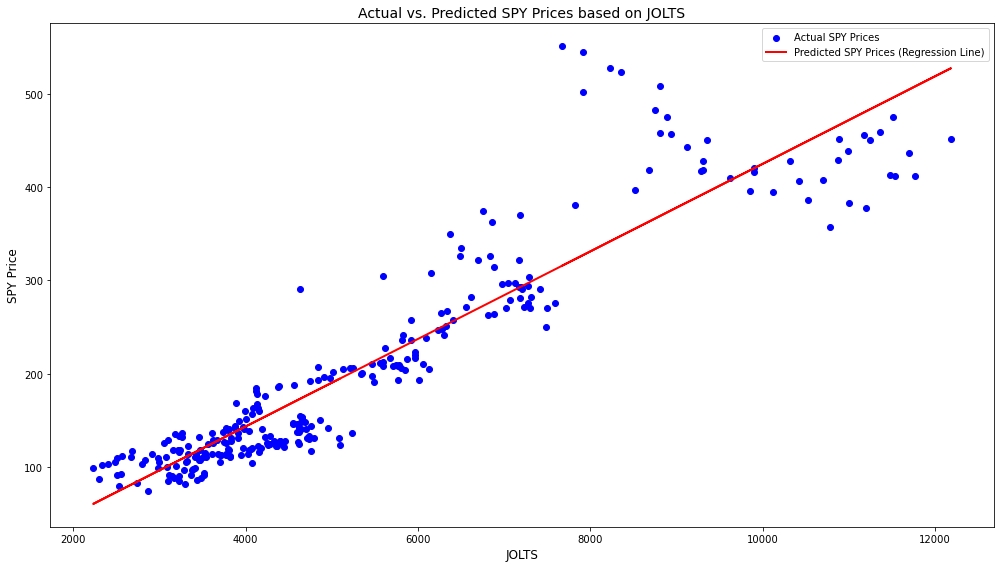

In [146]:
y_pred_all = model.predict(X)

plt.figure(figsize=(14, 8))

plt.scatter(merged_data['JTSJOL'], merged_data['Price'], color='blue', label='Actual SPY Prices')

plt.plot(merged_data['JTSJOL'], y_pred_all, color='red', label='Predicted SPY Prices (Regression Line)', linewidth=2)

plt.title('Actual vs. Predicted SPY Prices based on JOLTS', fontsize=14)
plt.xlabel('JOLTS', fontsize=12)
plt.ylabel('SPY Price', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


In [77]:
# Display first few rows to understand the structure of the data
spy_data.head(), jolts_data.tail()

(             Price    Open    High     Low     Vol. Change %
 Date                                                        
 2024-09-01  562.01  563.68  563.68  539.44  463.88M   -0.30%
 2024-08-01  563.68  552.57  564.20  510.27   62.70M    2.34%
 2024-07-01  550.81  545.63  565.16  537.45    1.04B    1.21%
 2024-06-01  544.22  529.02  550.28  522.60  888.92M    3.20%
 2024-05-01  527.37  501.38  533.07  499.55    1.15B    5.06%,
                   JTSJOL    25 MA    50 MA        90 MA      40 MA
 observation_date                                                  
 2024-03-01          8355  9977.12  9226.06  8117.522222   9973.975
 2024-04-01          7919  9806.60  9244.96  8143.388889  10003.000
 2024-05-01          8230  9664.88  9291.08  8168.488889  10029.125
 2024-06-01          7910  9522.36  9356.54  8190.111111  10031.425
 2024-07-01          7673  9381.12  9398.14  8212.955556  10010.275)

In [78]:
print(spy_data.columns)
print(jolts_data.columns)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
Index(['JTSJOL', '25 MA', '50 MA', '90 MA', '40 MA'], dtype='object')


## Linear Regression between SPY Prices and JOLTS (Job opennings)

This code analyzes the relationship between SPY prices and JOLTS data to predict future SPY prices. It filters actual SPY data up to October 1, 2022, and merges it with JOLTS data. After cleaning, it trains a linear regression model using JOLTS values (X_all) to predict SPY prices (y_all). The model is then applied to extended JOLTS data up to July 1, 2024, to generate future SPY price predictions. These predicted prices are added to the jolts_extended dataframe for comparison with actual trends.

In [116]:
spy_filtered = spy_data[spy_data.index <= '2024-07-01']  # Filter actual data
merged_all_dates = pd.merge(spy_filtered[['Price']], jolts_data, left_index=True, right_index=True, how='right')
merged_all_dates_clean = merged_all_dates.dropna(subset=['Price'])
X_all = merged_all_dates_clean[['JTSJOL']].values
y_all = merged_all_dates_clean['Price'].values

model_all_dates = LinearRegression()
model_all_dates.fit(X_all, y_all)

future_date = pd.to_datetime('2024-07-01')
jolts_extended = jolts_data[jolts_data.index <= future_date]
X_extended = jolts_extended[['JTSJOL']].values
y_pred_extended = model_all_dates.predict(X_extended)

merged_extended = jolts_extended.copy()
merged_extended['Predicted_SPY_Price'] = y_pred_extended
# The reason cutting the SPY dates until 2022-10-01 is because thats when the divergence between SPY Prices and JOLTS started. 
# From the start of the chart, the SPY Prices and JOLTS value appear to have a strong directional relationship. 
# However, something occured Oct 2022 that caused the SPY to change direction while the JOLTS kept heading down. 

In [117]:
X_all = merged_all_dates_clean[['JTSJOL']].values
y_all = merged_all_dates_clean['Price'].values

model_all_dates = LinearRegression()
model_all_dates.fit(X_all, y_all)

future_date = pd.to_datetime('2024-07-01')
jolts_extended = jolts_data[jolts_data.index <= future_date]
X_extended = jolts_extended[['JTSJOL']].values
y_pred_extended = model_all_dates.predict(X_extended)

merged_extended = jolts_extended.copy()
merged_extended['Predicted_SPY_Price'] = y_pred_extended

### Results and Interpretation: 
#### Analysis 1: 
- On this analysis, I was aiming to Predict SPY Prices based on it's relationship with the JOLTS report. 
- The chart shows SPY Prices continuing it's strong directional relationship with JOLTS, both continue to head down while SPY Prices start an upward move Oct 2022.
- A negative of this analysis is that it appears that The Predicted SPY Prices are overfitting to the JOLTS since the predicted prices deviate slightly from the actual prices on earlier dates and mirror the JOLTS too much.  

In [119]:
fig1 = go.Figure()

# Add SPY actual prices line (until October 2022)
fig1.add_trace(go.Scatter(x=merged_all_dates_clean.index, y=merged_all_dates_clean['Price'], mode='lines', name='Actual SPY Prices', yaxis='y1', line=dict(color='black', width=2)))

# Add predicted SPY prices line (extended until 2024) with a different color and dash
fig1.add_trace(go.Scatter(x=merged_extended.index, y=merged_extended['Predicted_SPY_Price'], mode='lines', name='Predicted SPY Prices (Extended)', yaxis='y1', line=dict(color='red', dash='dash', width=3)))

# Add JOLTS line on the right y-axis
fig1.add_trace(go.Scatter(x=merged_extended.index, y=merged_extended['JTSJOL'], mode='lines', name='JOLTS', yaxis='y2', line=dict(color='blue', width=2)))

# Update layout for first figure
fig1.update_layout(
    title='SPY Prices vs. JOLTS Trends (SPY Actual Prices stop on 2022-10-01)',
    xaxis_title='Date',
    yaxis=dict(title='SPY Price', side='left', showgrid=False),
    yaxis2=dict(title='JOLTS', overlaying='y', side='right'),
    legend_title='Data',
    hovermode='x unified'
)

# Show the first plot
fig1.show()


## Linear Regression #2 between SPY Prices and JOLTS (Job opennings)

#### Purpose of the 2nd Linear Regression: 
- The first code block uses SPY data up to July 1, 2024, to train a linear regression model with JOLTS data and predicts SPY prices for the same period without distinguishing between historical and future data. 
    - Filters SPY and JOLTS data from January 1, 2001, up to September 30, 2022, for modeling. Uses only actual SPY data for training the model and does not include future data beyond September 2022 for training purposes.
- It stores the predictions in a separate variable for the entire timeframe. In contrast, the second code block focuses on historical data, using SPY and JOLTS data only up to September 30, 2022, for model training. 
- It then predicts SPY prices for the entire JOLTS range, including future dates, and assigns these predictions to a new column for dates beyond September 2022. 
    - Trains the linear regression model using JOLTS data up to September 2022 to predict SPY prices based on historical relationships.
    - Creates a spy_combined DataFrame with combined actual and predicted SPY prices.
    - Assigns predicted SPY prices to the Combined_SPY_Price column only for future dates beyond September 2022.
- The second approach is more precise in distinguishing between past and future data, while the first approach combines everything into a single timeframe. Overall, the second code is more structured for handling time-specific predictions and visualizations.

In [123]:

spy_data.index = pd.to_datetime(spy_data.index)
jolts_data.index = pd.to_datetime(jolts_data.index)
spy_data = spy_data[spy_data.index >= '2001-01-01']
jolts_data = jolts_data[jolts_data.index >= '2001-01-01']

# Filter actual data up to September 2022 for modeling purposes
spy_filtered = spy_data[spy_data.index <= '2022-09-30']
jolts_filtered = jolts_data[jolts_data.index <= '2022-09-30']

# Merge the filtered data for the period before September 2022
merged_all_dates = pd.merge(spy_filtered[['Price']], jolts_filtered, left_index=True, right_index=True, how='right')
merged_all_dates_clean = merged_all_dates.dropna(subset=['Price'])

In [124]:
# Model to predict SPY based on JOLTS data before September 2022
X_all = merged_all_dates_clean[['JTSJOL']].values
y_all = merged_all_dates_clean['Price'].values

model_all_dates = LinearRegression()
model_all_dates.fit(X_all, y_all)

X_all_jolts = jolts_data[['JTSJOL']].values
y_pred_all = model_all_dates.predict(X_all_jolts)

# Create a new DataFrame for the combined actual and predicted SPY prices
spy_combined = spy_data[['Price']].copy()
spy_combined['Combined_SPY_Price'] = spy_combined['Price']

# Get the indices of the future dates in jolts_data and spy_combined
future_dates_jolts = jolts_data.index[jolts_data.index > '2022-09-30']
future_dates_spy = spy_combined.index[spy_combined.index > '2022-09-30']


In [129]:
# Ensure that the lengths of future_dates_spy and future_dates_jolts match for assignment
# Align the prediction to spy_combined future dates using the matching indices
aligned_predictions = pd.Series(y_pred_all, index=jolts_data.index)[future_dates_jolts]

# Find common indices between future dates of SPY and JOLTS for assignment
common_dates = future_dates_spy.intersection(aligned_predictions.index)
# Assign the aligned predictions to the Combined_SPY_Price column in spy_combined for common future dates
spy_combined.loc[common_dates, 'Combined_SPY_Price'] = aligned_predictions.loc[common_dates]

### Results and Interpretation: 
#### Analysis 2: 
- The purpose of the 2nd analysis is to only predict SPY prices after Oct 2022. 
- When looking at the Percentage difference on July 1, 2024 between Actual SPY Prices (550.81) and the Predicted Price (299.5), there was a 251.3 point difference, or 83.9% difference. 
- When we compare the July 1, 2024 Predicted Price from the original analysis (above) it was 315.1, for this 2nd analysis it is 299.5, and the actual price was 550.8. 

In [140]:
spy_combined['Price_Difference'] = spy_combined['Price'] - spy_combined['Combined_SPY_Price']
spy_combined['Percentage_Difference'] = ((spy_combined['Price'] - spy_combined['Combined_SPY_Price']) / spy_combined['Combined_SPY_Price']).abs() * 100
spy_combined.head()


,Price,Combined_SPY_Price,Price_Difference,Percentage_Difference
Date,,,,
2024-09-01,562.01,562.010000,0.000000,0.000000
2024-08-01,563.68,563.680000,0.000000,0.000000
2024-07-01,550.81,299.500564,251.309436,83.909503
2024-06-01,544.22,309.694303,234.525697,75.728128
2024-05-01,527.37,323.458002,203.911998,63.041260


In [138]:
# Plotting with Plotly
fig1 = go.Figure()
# 1. Actual SPY prices line for all available dates
fig1.add_trace(go.Scatter(x=spy_data.index, y=spy_data['Price'], 
                          mode='lines', name='Actual SPY Prices (Sept 2022 Onwards)', yaxis='y1', 
                          line=dict(color='black', width=2)))
# 2. JOLTS line on the right y-axis for all available dates
fig1.add_trace(go.Scatter(x=jolts_data.index, y=jolts_data['JTSJOL'], 
                          mode='lines', name='JOLTS', yaxis='y2', 
                          line=dict(color='blue', width=2)))
# 3. Combined SPY line (Actual until September 2022, Predicted thereafter)
fig1.add_trace(go.Scatter(x=spy_combined.index, y=spy_combined['Combined_SPY_Price'], 
                          mode='lines', name='Combined SPY Prices (Actual + Predicted)', yaxis='y1', 
                          line=dict(color='red', width=2, dash='dash')))
# Update layout to set the end date on the x-axis to July 1, 2024
fig1.update_layout(
    title='SPY Prices vs. JOLTS Trends (SPY Actual Prices 01-2001 - 10-2022, SPY Predicted Prices 10-2022 Onwards)',
    xaxis_title='Date',
    yaxis=dict(
        title='SPY Price',
        side='left',
        showgrid=False,
        range=[0, 600]  
    ),
    yaxis2=dict(
        title='JOLTS',
        overlaying='y',
        side='right',
        showgrid=False,
        range=[2000, 12000] 
    ),
    legend=dict(
        title='Data',
        orientation='h',  
        yanchor='top',  
        y=-0.2,  
        xanchor='center',  
        x=0.5  
    ),
    hovermode='x unified',
    xaxis=dict(range=[pd.to_datetime('2001-01-01'), pd.to_datetime('2024-07-01')])  
    # Set the x-axis range from 2001-01-01 to 2024-07-01 because if not a horizontal line appears at the end of the chart for predicted prices
)
# Show the plot
fig1.show()

##

## Conclusion:

The reason I conducted this analysis was to practice my python skills in addition to feed by economic curiosity. I wondered about the relationship between job openings which in my opinion indicate a strong economy, and the SPY500. The SPY500 is widely known as the ETF that tracks the economy. I wondered if higher prices would also indicate strong job opennings. I was surprised to discover a strong correlation of .92. However, I noticed a divergence after October 2022. What happened after this point? I plan to conduct further investigation to understand what brought the first divergence between SPY Prices and JOLTS. A divergence, especially if it's the first of its kind, could signal that the economic landscape is changing. What became popular around this time that changed the landscape? 

Perhaps there is a mismatch in market expectations. As we know, the market often prices in future expectation long in advance. If there is a divergence, could it mean that the market is misunderstanding how the low JOLTS reports impact the economic landscape, or does the market believe low JOLTS reports mean better corporate earnings? How can low JOLT result in economic growth? 

Perhaps the low correlation indicates market participants are expecting Monetary Policies to change. Therefore, they don't want to miss the SPY Price growth occuring now (July 2024 Price of 550) and expect monetary policy changes to help accelarate the growth further. While at the same time, organizations need to continue to beat corporate earnings year over year and therefore need to prioritize margins. This can also mean there is a lower need for new talent and instead are spending most of there funds in other new innovations. 

Many previous reports I have read before indicate that the labor market is often a lagging indicator of economic conditions since its a spiral of low employment, which can result in less economic spending. 

**This divergence could be implying one of the following scenarious:** 
1. Is this divergence implying that the organizations job opennings anticipate economic challenges that has not materialized in the stock market. 
2. Is this divergence implying that the stock market is anticipating strong economic growth dispite the low JOLTS. Currenly the unemployment rate is at a historic low. 
3. Is this divergence implying that we do not need strong JOLTS values to have high SPY Prices? Do we need a relationship between JOLTS and SPY? And what does it mean if there is no longer a relationship? Is this signaling a change in landscape of the economy? 

.............So many questions brewing

**What could happen next?**
1. I plan to continue to monitor the relationship between JOLTS and SPY as I am interested in seeing what unfolds. 
2. What could potentially be the next moves?
    - **Best Case scenario:** Monetary Policy changes and JOLTs increase as SPY Prices increase as well. If this happens, will JOLTS catch up to SPY to mirror the directional relationship of the past. 
    - **OK Case Scenario:** Monetary Policy changes and JOLTs increase as SPY Prices trade in a range until JOLT values catch up as a reversion to the mean? Can this be possible? 
    - **Weird Case Scenario:** JOLT values continue to decrease as SPY Prices continue to increase. 
    - **Worst case Scenario:** JOLT value stay relatively the same as SPY Prices met it at the predicted values (315 or 299)
    - **POOPY DOOPY Case Scenario:** JOLT values continue to decrease low as SPY prices met it to the predicted values (315 or 299). 